### Student Details

Student name: Elsa Anza Martín 

Student ID: 21272808

# Option 2: Linear and non-linear SVM

## Part 1: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

In [14]:
################################
# import dependencies
import numpy as np
import pandas as pd

In [15]:
#importing data 
df = pd.read_csv('iris_data.csv', header=0)
df

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Replacing string variable labels with integer values by using pandas replace function.

In [16]:
df.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2], inplace=True)
df

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
#import petal length and petal width 
X = df.iloc[:, [2,3]].values

#labels is class
y = df.iloc[:,4].values

In [18]:
#split train and test values
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.3, stratify=y)

In [19]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [20]:
X_train[0:10]

array([[ 0.75680515,  0.98596226],
       [ 1.67260299,  0.98596226],
       [ 1.04299198,  1.49448147],
       [ 0.5278557 ,  0.22318343],
       [ 0.87127988,  1.36735167],
       [-1.47545206, -1.30237421],
       [ 0.5278557 ,  0.22318343],
       [-1.4182147 , -1.0481146 ],
       [ 0.3561436 ,  0.22318343],
       [-0.15899268, -0.28533578]])

In [21]:
X_test[0:10]

array([[-1.30373997, -1.30237421],
       [ 0.64233042,  0.35031324],
       [ 0.3561436 ,  0.22318343],
       [-1.18926524, -1.17524441],
       [ 0.75680515,  1.49448147],
       [ 0.12719414,  0.09605363],
       [-1.24650261, -1.30237421],
       [-0.04451795, -0.28533578],
       [-1.24650261, -1.0481146 ],
       [ 0.92851725,  1.11309206]])

In [22]:
#train SVC
import numpy as np
import sklearn
from sklearn.svm import SVC
clf = sklearn.svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### Visualisation
Using the auxilary code to visualise the predicted classes and the model's decision boundary 

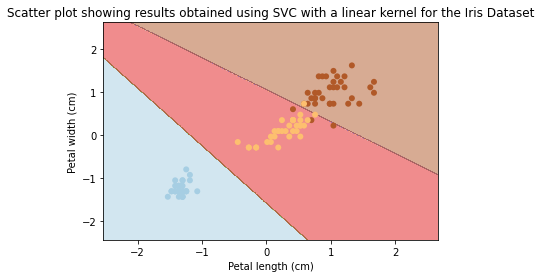

In [23]:
import matplotlib.pyplot as plt

from plot_decision_boundary import plot_decision_boundary
plot_decision_boundary(X_train,y_train, clf)

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Scatter plot showing results obtained using SVC with a linear kernel for the Iris Dataset")
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9555555555555556